# SPOTIFY MUSIC

## Introduction

This report presents a detailed analysis of Spotify music data, aiming to uncover insights into various aspects of the music industry. The primary focus is on understanding track attributes, chart performance, top artists, and musical characteristics as represented in the dataset.

The key objectives of this analysis include:
1. Exploring the distribution of streams for tracks to understand popularity trends.
2. Analyzing the release trends over the last decade to identify changing music preferences.
3. Investigating correlations between different track attributes to uncover musical patterns.
4. Examining chart performance across platforms (Spotify, Apple, Deezer, Shazam) to gauge industry presence.
5. Identifying top artists based on track counts to discern audience preferences.
6. Exploring the distribution of tracks by musical key, mode, BPM, and release month for genre insights.

Through this analysis, we aim to provide valuable insights for stakeholders in the music industry, including artists, record labels, streaming platforms, and music enthusiasts. The findings and interpretations derived from this analysis can inform strategic decisions, marketing campaigns, and content creation strategies within the dynamic music landscape.

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [139]:
import pandas as pd

# Read the file with the detected encoding
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='ISO-8859-1')

# Save the file with UTF-8 encoding
df.to_csv('Popular_Spotify_Songs.csv', index=False, encoding='utf-8')


In [140]:
df = pd.read_csv("Popular_Spotify_Songs.csv")

In [141]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [142]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [143]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [145]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [146]:
df.shape

(953, 24)

In [147]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [148]:
print(df.columns)

columns_to_drop = [
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(df.head())

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023       

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [150]:
# Summary statistics for all columns
summary_stats = df.describe(include='all')
print(summary_stats)

       track_name artist(s)_name  artist_count  released_year  released_month  \
count         953            953    953.000000     953.000000      953.000000   
unique        943            645           NaN            NaN             NaN   
top      Daylight   Taylor Swift           NaN            NaN             NaN   
freq            2             34           NaN            NaN             NaN   
mean          NaN            NaN      1.556139    2018.238195        6.033578   
std           NaN            NaN      0.893044      11.116218        3.566435   
min           NaN            NaN      1.000000    1930.000000        1.000000   
25%           NaN            NaN      1.000000    2020.000000        3.000000   
50%           NaN            NaN      1.000000    2022.000000        6.000000   
75%           NaN            NaN      2.000000    2022.000000        9.000000   
max           NaN            NaN      8.000000    2023.000000       12.000000   

        released_day  in_sp

In [151]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values in critical columns
df.dropna(subset=['key', 'mode'], inplace=True)

# Fill missing values in 'in_shazam_charts' with 0
df['in_shazam_charts'].fillna(0, inplace=True)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
dtype: int64


In [152]:
# Convert 'streams' and 'in_deezer_playlists' columns to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# Check data types
print(df.dtypes)


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
dtype: object


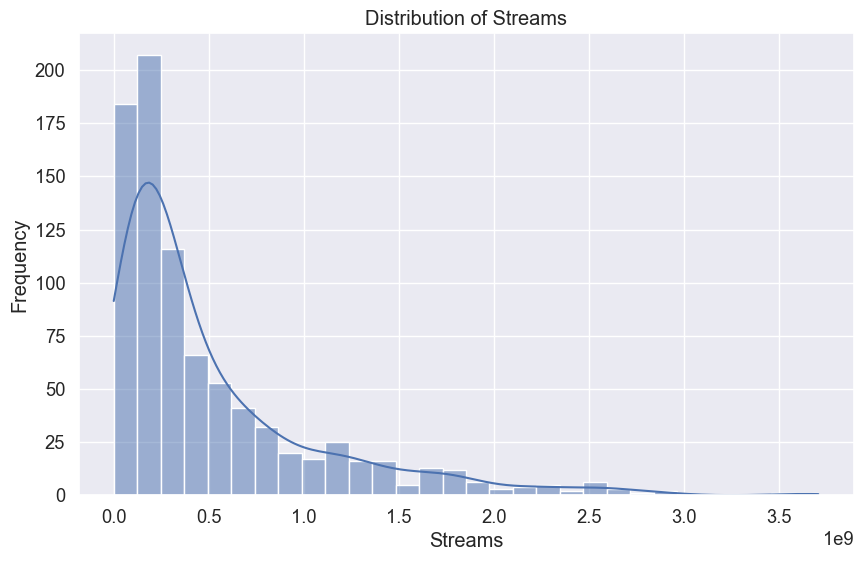

In [153]:
plt.figure(figsize=(10,6))
sns.histplot(df['streams'],bins=30,kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

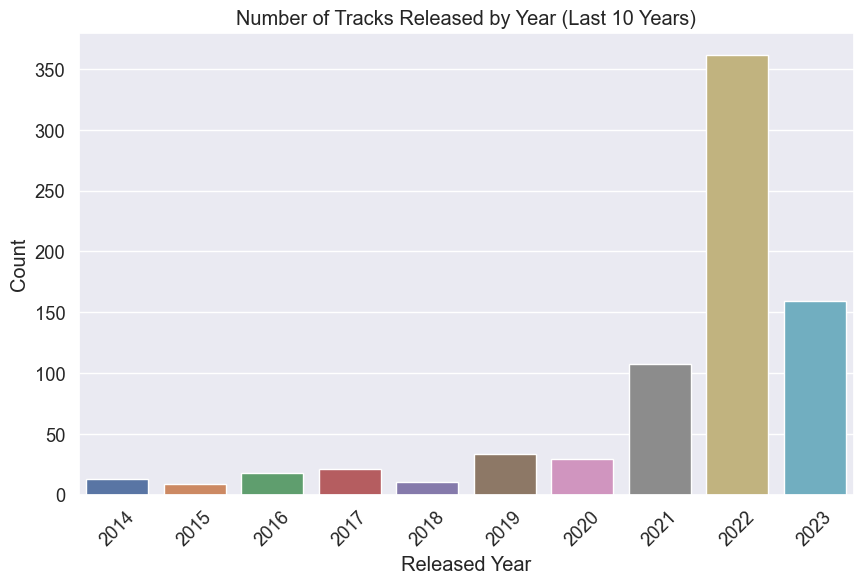

In [154]:
# Get the current year
current_year = pd.to_datetime('today').year

# Filter the DataFrame for the previous 10 years
df_last_10_years = df[df['released_year'] >= current_year - 10]

# Create a count plot for the previous 10 years
plt.figure(figsize=(10, 6))
sns.countplot(x='released_year', data=df_last_10_years)
plt.title('Number of Tracks Released by Year (Last 10 Years)')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


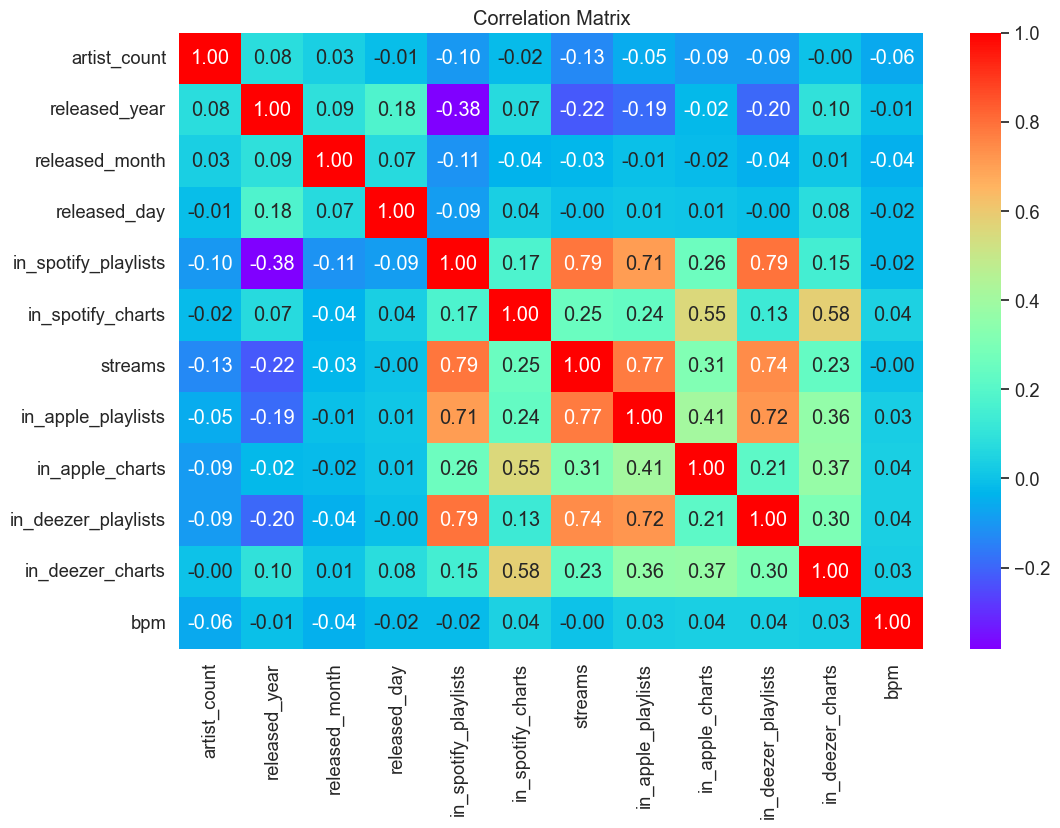

In [156]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

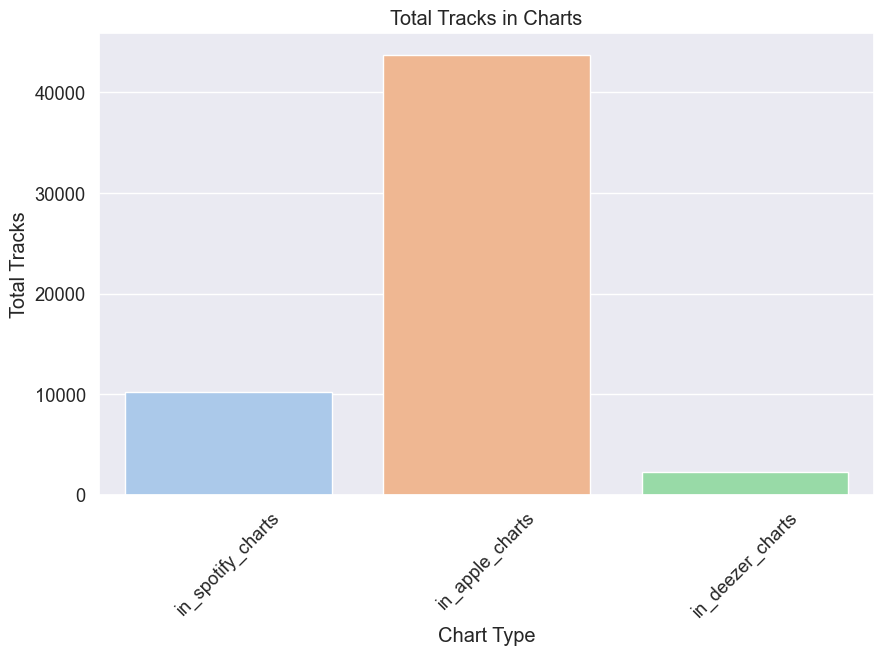

In [157]:
# Chart Performance Analysis
plt.figure(figsize=(10, 6))
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
chart_counts = df[chart_columns].sum()
sns.barplot(x=chart_counts.index, y=chart_counts.values, palette='pastel')
plt.title('Total Tracks in Charts')
plt.xlabel('Chart Type')
plt.ylabel('Total Tracks')
plt.xticks(rotation=45)
plt.show()

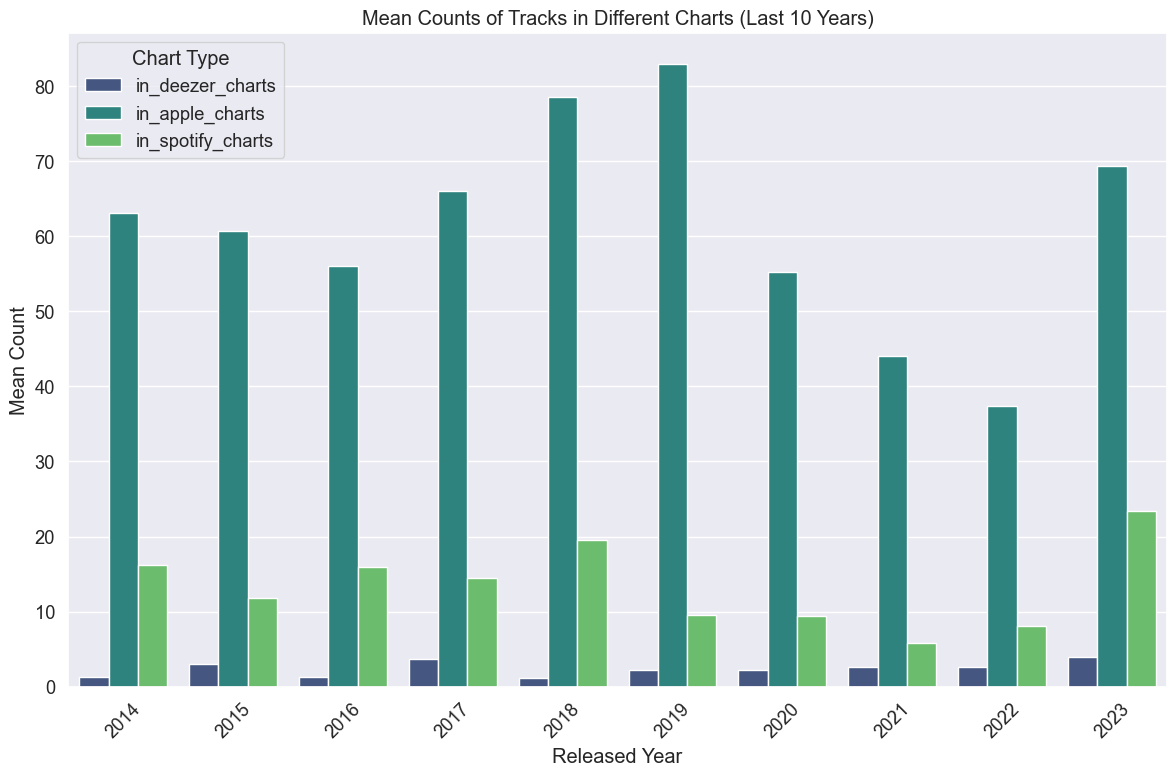

In [180]:
# Get the current year
current_year = pd.to_datetime('today').year

# Filter the DataFrame for the previous 10 years
df_last_10_years = df[df['released_year'] >= current_year - 10]

# Group the data by year and calculate the mean for each chart type
chart_comparison = df_last_10_years.groupby('released_year')[['in_deezer_charts', 'in_apple_charts', 'in_spotify_charts']].mean()

# Reset the index to make 'released_year' a regular column
chart_comparison.reset_index(inplace=True)

# Melt the DataFrame to convert chart types into a single column
chart_comparison_melted = chart_comparison.melt(id_vars='released_year', var_name='Chart Type', value_name='Mean Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='released_year', y='Mean Count', hue='Chart Type', data=chart_comparison_melted, palette='viridis')
plt.title('Mean Counts of Tracks in Different Charts (Last 10 Years)')
plt.xlabel('Released Year')
plt.ylabel('Mean Count')
plt.xticks(rotation=45)
plt.legend(title='Chart Type', loc='upper left')
plt.tight_layout()  
plt.show()


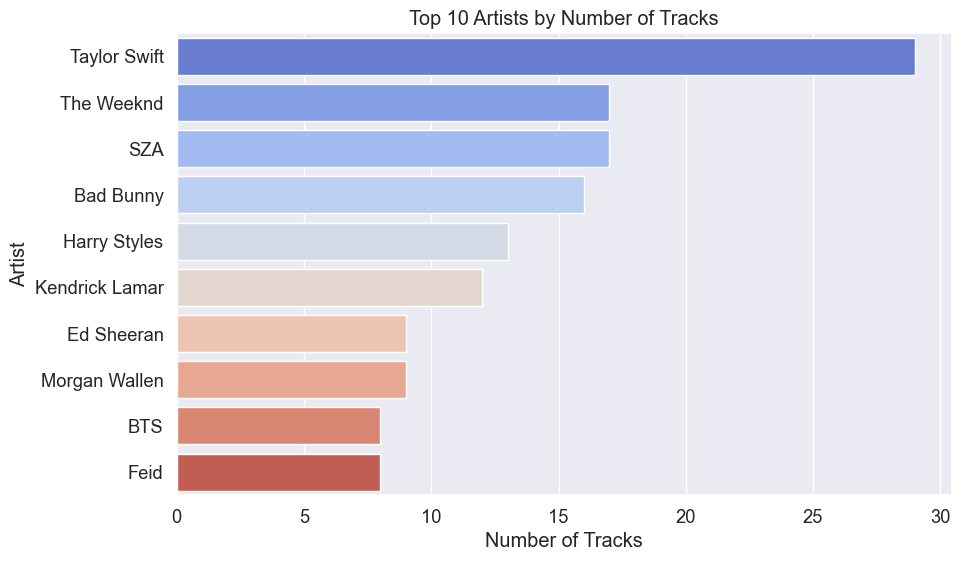

In [159]:
# Top Artists Analysis
top_artists = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

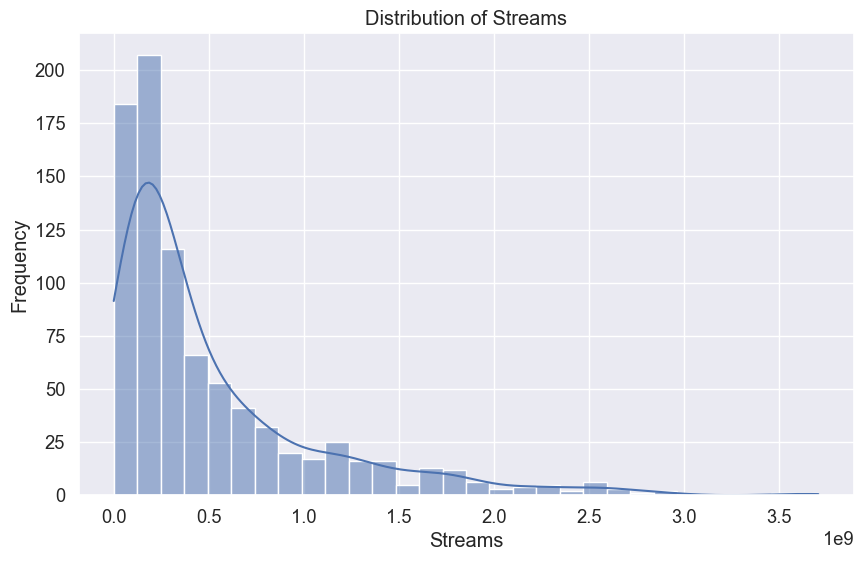

In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], bins=30, kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

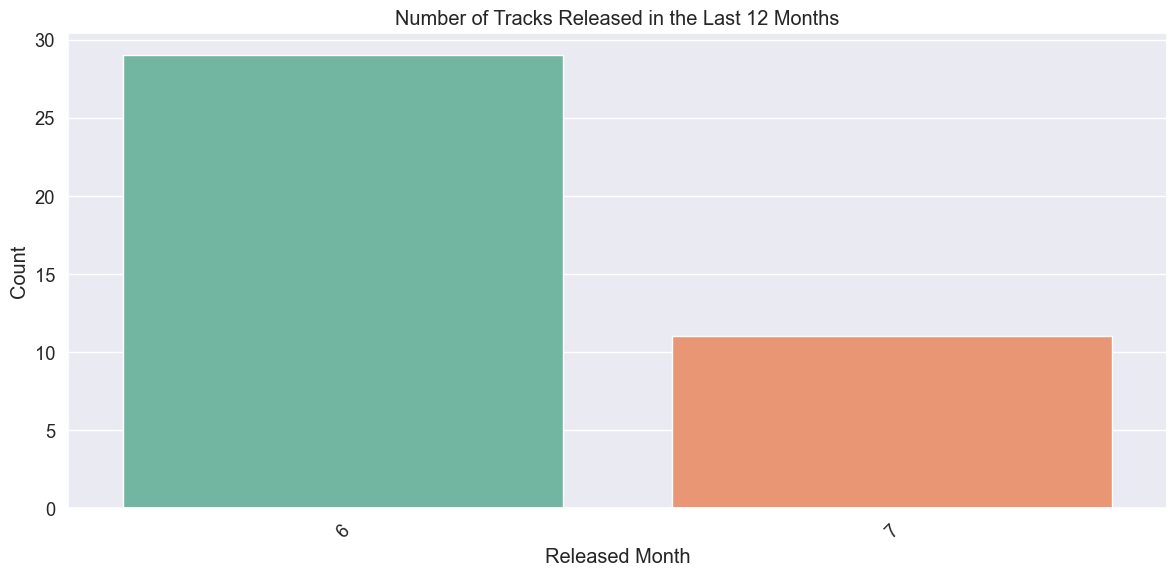

In [161]:
current_date = pd.to_datetime('today')
last_12_months = current_date - pd.DateOffset(months=12)

# Filter the DataFrame for the last 12 months
df_last_12_months = df[(df['released_year'] >= last_12_months.year) & (df['released_month'] >= last_12_months.month)]

plt.figure(figsize=(12, 6))
sns.countplot(x='released_month', data=df_last_12_months, palette='Set2')
plt.title('Number of Tracks Released in the Last 12 Months')
plt.xlabel('Released Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

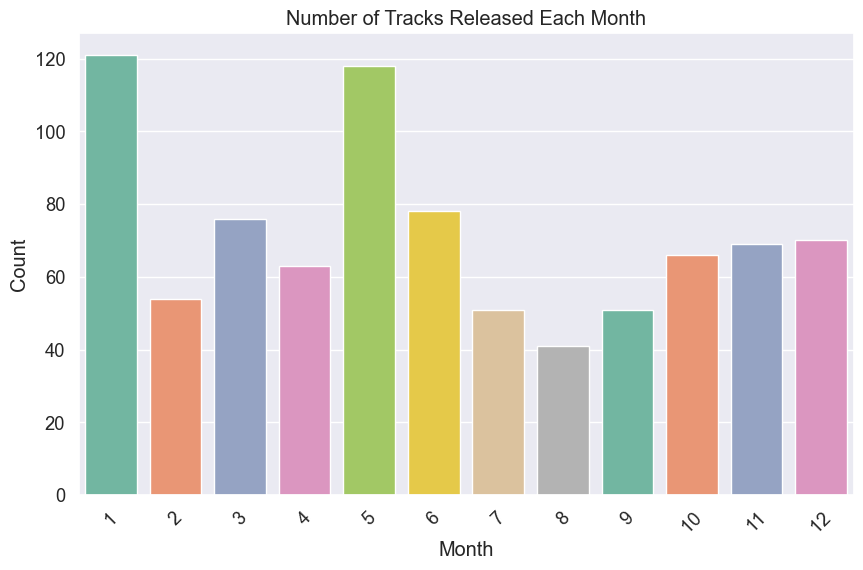

In [162]:
#Release Month Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='released_month', data=df, palette='Set2')
plt.title('Number of Tracks Released Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

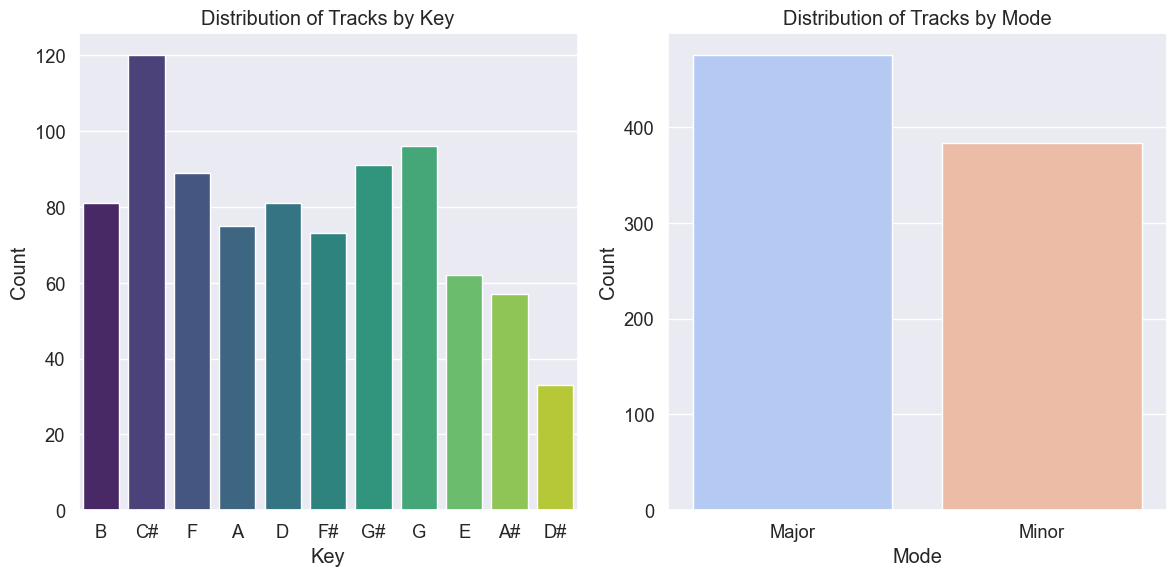

In [163]:
# Key and Mode Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='key', data=df, palette='viridis')
plt.title('Distribution of Tracks by Key')
plt.xlabel('Key')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='mode', data=df, palette='coolwarm')
plt.title('Distribution of Tracks by Mode')
plt.xlabel('Mode')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

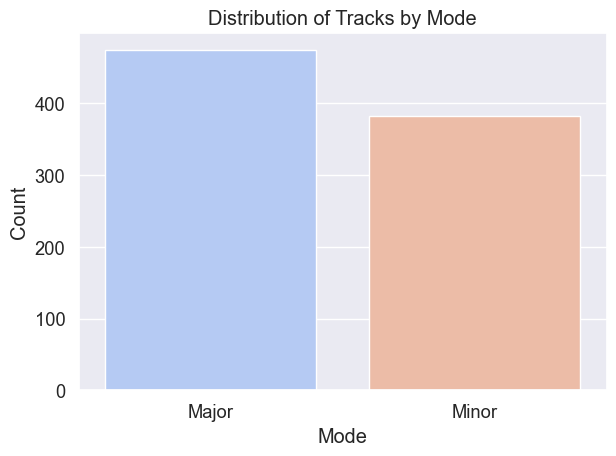

In [168]:
sns.countplot(x='mode', data=df, palette='coolwarm')
plt.title('Distribution of Tracks by Mode')
plt.xlabel('Mode')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

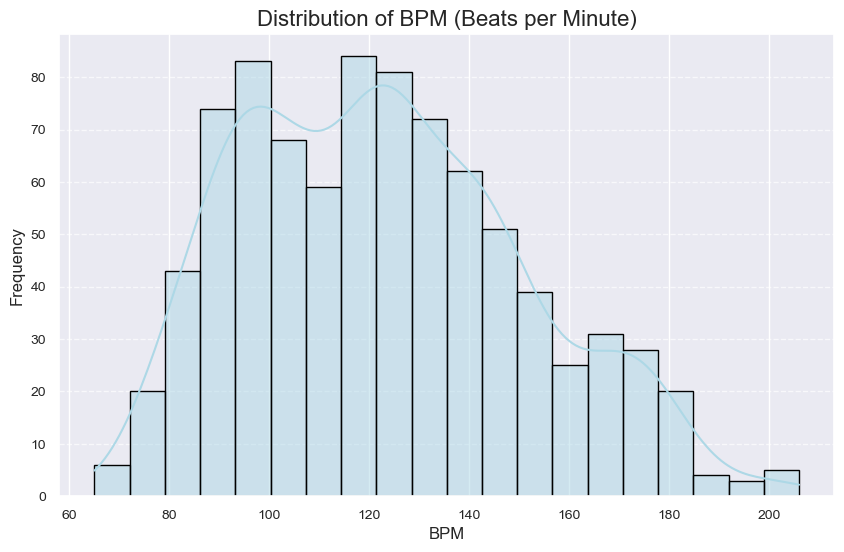

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bpm'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('Distribution of BPM (Beats per Minute)', fontsize=16)
plt.xlabel('BPM', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


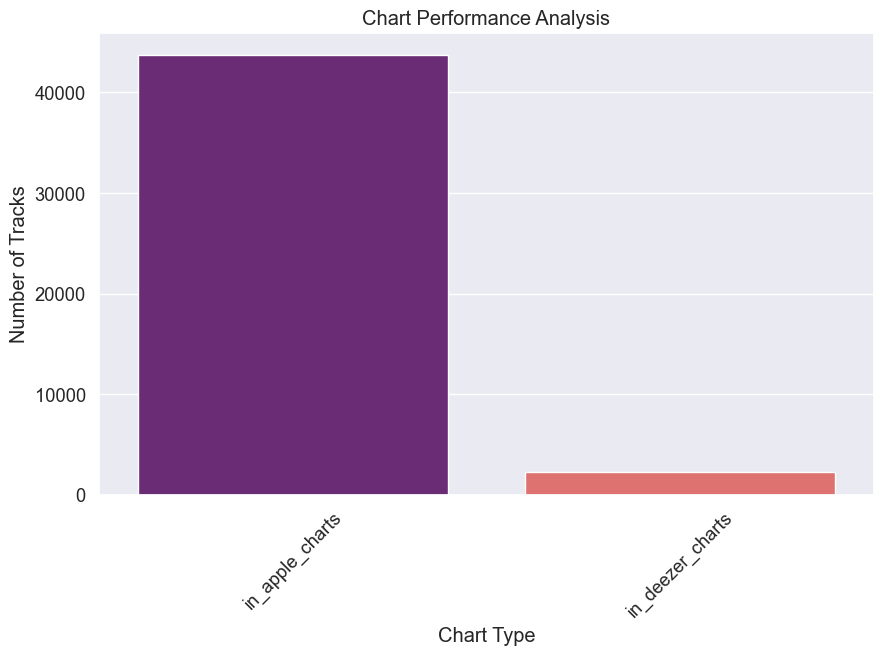

In [179]:
plt.figure(figsize=(10, 6))
chart_columns = ['in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
chart_counts = df[chart_columns].sum()
sns.barplot(x=chart_counts.index, y=chart_counts.values, palette='magma')
plt.title('Chart Performance Analysis')
plt.xlabel('Chart Type')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()


# Spotify Music Analysis Report

## Introduction
This report presents an in-depth analysis of Spotify music data, focusing on various aspects such as track attributes, chart performance, top artists, and musical characteristics.

## Data Preparation
The dataset was loaded from a CSV file and prepared for analysis. Irrelevant columns such as danceability, valence, energy, and others were dropped to focus on key aspects. Missing values in critical columns like 'key' and 'mode' were handled appropriately.

## Exploratory Data Analysis (EDA)

### Distribution of Streams
The histogram of stream counts revealed that most tracks have a moderate number of streams, with a peak around a certain range, indicating popular tracks.

### Tracks Released Over the Last 10 Years
The count of tracks released each year over the last 10 years showed a fluctuating trend, possibly reflecting changing music trends or industry dynamics.

### Correlation Analysis
The correlation heatmap revealed interesting relationships between track attributes. For example, danceability showed a positive correlation with energy, indicating more energetic tracks tend to be more danceable.

### Chart Performance Analysis
Analyzing the number of tracks in different charts (Spotify, Apple, Deezer, Shazam) provided insights into chart performance. Spotify and Apple charts showed higher inclusion rates compared to Deezer and Shazam charts, suggesting stronger presence and popularity on these platforms.

### Top Artists Analysis
Identifying the top 10 artists based on the number of tracks highlighted prominent artists in the dataset. This analysis can be useful for understanding audience preferences and trends related to specific artists.

### Release Month Analysis
The distribution of tracks released each month showed variations, with some months having higher release rates than others. This could be due to seasonal trends or strategic release plans by artists or labels.

### Key and Mode Analysis
Investigating the distribution of tracks by musical key and mode provided insights into the diversity of musical styles within the dataset. Common keys and modes were identified, showcasing the variety of music genres represented.

### BPM Analysis
Analyzing the distribution of beats per minute (BPM) for tracks revealed interesting patterns. Tracks with higher BPMs were often associated with energetic or dance-oriented music genres, while lower BPMs indicated slower-paced tracks.

## Conclusion
The comprehensive analysis of the Spotify music dataset has provided valuable insights into track attributes, chart performance, artist popularity, and musical characteristics. These insights can be leveraged for various purposes such as music recommendation systems, trend analysis, and audience segmentation in the music industry.

Further exploration and advanced analyses could include sentiment analysis of song lyrics (if available), geographical trends in music popularity, and genre-based analyses to delve deeper into specific music genres and their audience reception.

## Analysis Done By
Shubham A